In [1]:
from datasets.builder import Tokenize, WordAugTokenizeWrapper, build_img_transform, build_text_transform
from datasets.tokenizer import SimpleTokenizer
from braceexpand import braceexpand
import os.path as osp
import webdataset as wds
import json
import random
import matplotlib.pyplot as plt

from utils.myutils import extract_words

/opt/conda/envs/groupvit/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tar_file_list = []
path = "/workspace/Dataset/local_data/clip-vit-b-16_8_c3_shards/"
prefix = "c3-{000000..000001}.tar"
for tar_file in braceexpand(osp.join(path, prefix)):
    tar_file_list.append(tar_file)

In [3]:
dataset = (
    wds.WebDataset(tar_file_list, repeat=True)
    .decode('pil')
    .rename(image='jpg;png;jpeg', text='text;txt', keep=False,)
    )

Text : cross and other souvenirs which are made
Nouns : ['made' 'souvenirs' 'are']
Keywords : ['stall', 'bronze', 'shields']


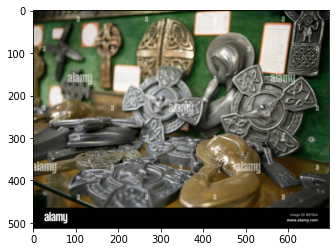

In [14]:
idx = random.randint(0, 200)

for i, data in enumerate(dataset):
    if i == idx:
        img = data['image']
        text, nouns, keywords = extract_words(data['text'])
        break
plt.imshow(img)

print('Text : {}'.format(text))
print('Nouns : {}'.format(nouns))
print('Keywords : {}'.format(keywords))